<div style="background-color: #f9f9f9; padding: 20px; border-left: 5px solid #007bff; border-radius: 5px;">
    <h2 style="margin-top: 0; color: #333;">Assignment Metadata</h2>
    <table style="width: 100%; border-collapse: collapse; border: none;">
        <tr style="border: none;">
            <td style="width: 15%; font-weight: bold; border: none; padding: 5px;">Author:</td>
            <td style="border: none; padding: 5px;">Ashish Saha</td>
        </tr>
        <tr style="border: none;">
            <td style="font-weight: bold; border: none; padding: 5px;">Contact:</td>
            <td style="border: none; padding: 5px;">
                <a href="https://www.linkedin.com/in/ashishsaha21" target="_blank" rel="noopener noreferrer" style="text-decoration: none; margin-right: 5px;">
                    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=flat&logo=linkedin&logoColor=white" alt="LinkedIn" style="vertical-align: text-bottom;">
                </a>
                <a href="https://github.com/Ashish1100" target="_blank" rel="noopener noreferrer" style="text-decoration: none; margin-right: 5px;">
                    <img src="https://img.shields.io/badge/GitHub-100000?style=flat&logo=github&logoColor=white" alt="GitHub" style="vertical-align: text-bottom;">
                </a>
                <a href="mailto:ashishsaha.software@gmail.com" style="text-decoration: none;">
                    <img src="https://img.shields.io/badge/Email-D14836?style=flat&logo=gmail&logoColor=white" alt="Email" style="vertical-align: text-bottom;">
                </a>
            </td>
        </tr>
        <tr style="border: none;">
            <td style="font-weight: bold; border: none; padding: 5px;">Date:</td>
            <td style="border: none; padding: 5px;">December, 2025</td>
        </tr>
    </table>
</div>

# Assignment: Student Grade Predictor

## Objective
Build a simple AI model to predict a student’s exam score based on the number of hours studied.

---

## Why This Matters

**Fundamental Concept**  
- Uses **Linear Regression**, often called the *“Hello World” of Machine Learning*.  
- Demonstrates how models learn relationships between variables (e.g., more study time → higher score).

**Real-World Relevance**  
- The same approach is used in:
  - Banking (loan amount prediction)
  - Ride-sharing apps (ETA prediction)
  - Sales and demand forecasting

---

## Step 1: Setup & Data Creation

**Explanation**  
Import the required Python libraries-essential tools for the project:

- **pandas** → Work with tabular data (like Excel sheets)
- **numpy** → Perform numerical and mathematical operations
- **matplotlib** → Visualize data using plots and charts
- **scikit-learn (sklearn)** → Build and train machine learning models

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib # Used for saving the model
import os

# --- CREATE DUMMY DATA ---
# We are creating a dictionary of data: Hours Studied vs. Scores
data = {
    'Hours_Studied': [2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4],
    'Exam_Score':    [21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24, 67, 69]
}

# Convert this dictionary into a Pandas DataFrame (a neat table)
df = pd.DataFrame(data)

# Save this to a CSV file called 'student_scores.csv'
# index=False means we don't want to save row numbers (0, 1, 2...)
df.to_csv('student_scores.csv', index=False)

print("Setup Complete. 'student_scores.csv' file created successfully.")
print(df.head()) # Show the first 5 rows

Setup Complete. 'student_scores.csv' file created successfully.
   Hours_Studied  Exam_Score
0            2.5          21
1            5.1          47
2            3.2          27
3            8.5          75
4            3.5          30


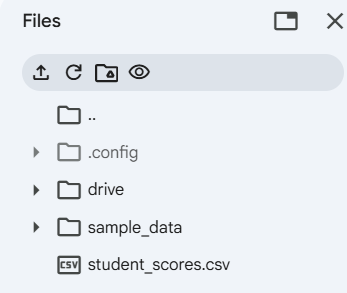

## Step 2: Visualize the Data

**Explanation**  
Before training the model, it’s important to understand the data visually. We use a **scatter plot** to observe the relationship between study time and exam score.

- **X-axis:** Hours Studied  
- **Y-axis:** Exam Score  

**Interpretation**  
- If the points trend upward from left to right, it indicates a **positive correlation**.  
- This means that as study hours increase, exam scores also tend to increase.  
- Such a pattern confirms that **Linear Regression** is an appropriate model for this problem.


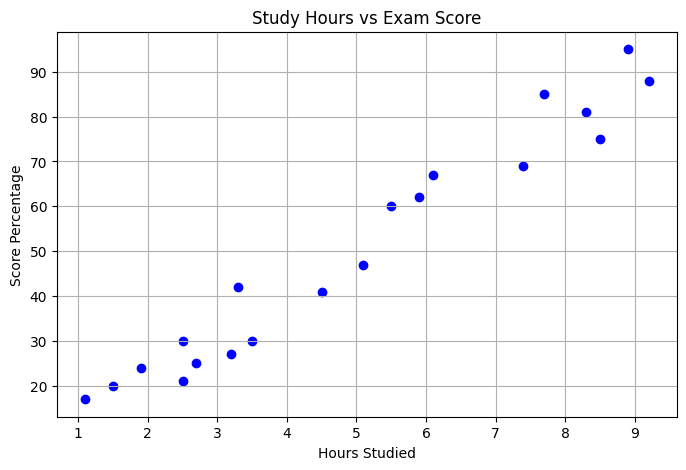

In [2]:
# Read the CSV file we just created
df = pd.read_csv('student_scores.csv')

# Plotting the data
plt.figure(figsize=(8, 5))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue', label='Actual Data')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score Percentage')
plt.grid(True)
plt.show()

## Step 3: Data Preparation (Train–Test Split)

**Explanation**  
A model should not be evaluated on the same data it was trained on-that leads to **overfitting**.  
To ensure a fair evaluation, the dataset is split into two parts:

- **Training Set (80%)**  
  Used by the model to learn the relationship between inputs and outputs.

- **Testing Set (20%)**  
  Unseen data used to evaluate how well the model generalizes.

**Feature Separation**
- **Input (X):** Hours studied  
- **Output (y):** Exam score  

This separation allows the model to learn from inputs and make predictions on new data.


In [3]:
# X is our input (Features). We use double brackets [[ ]] to make it a 2D array (standard for sklearn)
X = df[['Hours_Studied']]

# y is our output (Target).
y = df['Exam_Score']

# Split the data
# test_size=0.2 means 20% of data is for testing
# random_state=42 ensures we get the same random split every time we run this code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")

Training data size: 16 samples
Testing data size: 4 samples


## Step 4: Training the Model

**Explanation**  
This is the core step where the model learns from data using **Linear Regression**.

**Mathematical Form**  
Linear Regression fits a straight-line equation:

\[
y = mx + c
\]

Where:
- **\(y\)** → Predicted exam score  
- **\(x\)** → Hours studied  
- **\(m\)** → Coefficient (score increase per additional hour studied)  
- **\(c\)** → Intercept (predicted score with 0 hours of study)

**Model Training**  
- The `fit()` method instructs the algorithm to analyze `X_train` and `y_train`.  
- It computes the optimal values of **\(m\)** and **\(c\)** that best represent the data.


In [4]:
# Initialize the model
model = LinearRegression()

# Train the model (The "Learning" phase)
model.fit(X_train, y_train)

print("Training complete.")
print(f"Intercept (Score at 0 hours): {model.intercept_:.2f}")
print(f"Coefficient (Points gained per hour): {model.coef_[0]:.2f}")

Training complete.
Intercept (Score at 0 hours): 4.68
Coefficient (Points gained per hour): 9.20


## Step 5: Model Evaluation (Grading the AI)

**Explanation**  
The trained model is evaluated using the **Testing Set (`X_test`)**, which it has never seen before.  
This helps verify whether the model has truly learned the pattern rather than memorizing data.

**Evaluation Metrics**

- **Mean Absolute Error (MAE)**  
  - Average absolute difference between predicted and actual scores.  
  - Interpreted in exam points.  
  - **Lower is better**.

- **Root Mean Squared Error (RMSE)**  
  - Penalizes larger errors more heavily than MAE.  
  - Useful when big mistakes are especially undesirable.  
  - **Lower is better**.

- **R-squared Score \(R^2\)**  
  - Measures how well the regression line fits the data.  
  - **1.0** → Perfect fit
  - **0.0** → Model explains no variance in the data


In [5]:
# Predict scores for the test data
y_pred = model.predict(X_test)

# Compare predictions (y_pred) with actual answers (y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is just the square root of MSE
r2 = r2_score(y_test, y_pred)

print("--- Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.2f} points")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} points")
print(f"R-squared Score: {r2:.2f}")

if r2 > 0.8:
    print("Verdict: Great model! Highly accurate.")
else:
    print("Verdict: Model needs improvement.")

--- Model Performance ---
Mean Absolute Error (MAE): 5.39 points
Root Mean Squared Error (RMSE): 5.93 points
R-squared Score: 0.96
Verdict: Great model! Highly accurate.


## Step 6: Saving the Model to Google Drive

**Explanation**  
Training a model can be time-consuming. To avoid retraining it every time, we **save (serialize)** the trained model to a file (commonly `.pkl` or `.joblib`).

- This file stores the learned parameters of the model.
- It allows us to reload the model later and perform predictions instantly.
- Saving the model to **Google Drive** ensures it persists even after the session ends.

**Note**  
- When running this step in Google Colab, we will be prompted to **authorize access to Google Drive**.


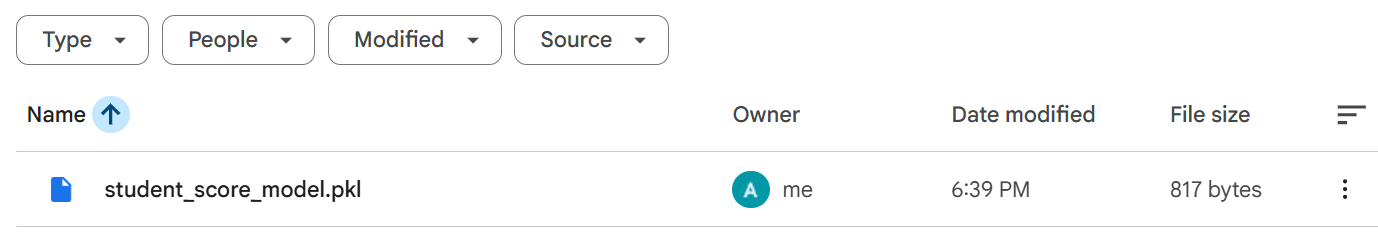

In [6]:
from google.colab import drive

# Mount Google Drive
print("Mounting Drive...")
drive.mount('/content/drive')

# Define the folder where we want to save the model
# Change 'My_ML_Models' to whatever folder name we prefer
save_folder = '/content/drive/My Drive/4. Projects/Model'

# Create the folder if it doesn't exist
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Define the filename
filename = os.path.join(save_folder, 'student_score_model.pkl')

# Save the model
joblib.dump(model, filename)
print(f"Model successfully saved to: {filename}")

Mounting Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model successfully saved to: /content/drive/My Drive/4. Projects/Model/student_score_model.pkl


## Step 7: Real-World Inference (Load & Predict)

**Explanation**  
This step demonstrates how the trained model is used in a real application.

**Workflow Example**
1. A student visits our application or website.
2. They enter their study time (e.g., **9.5 hours**).
3. The system loads the saved model file (`.pkl`) from Google Drive.
4. The model instantly predicts the expected exam score.

**Key Benefit**  
- No retraining is required.  
- Predictions are fast, consistent, and ready for real-world deployment.


In [7]:
# Load the model from the file (Simulating a new session)
loaded_model = joblib.load(filename)

# Let's predict for a specific student who studied 9.5 hours
hours_input = 9.5

# We must convert the input to a 2D array like [[9.5]] because the model expects that format
# create a dataframe with the column name 'Hours_Studied'
new_data = pd.DataFrame([[hours_input]], columns=['Hours_Studied'])

# Now predict using this dataframe
prediction = loaded_model.predict(new_data)

print(f"--- Final Prediction ---")
print(f"If you study for {hours_input} hours, you are predicted to score: {prediction[0]:.2f}%")

--- Final Prediction ---
If you study for 9.5 hours, you are predicted to score: 92.06%
